In [15]:
# Krajbich, Armel, Rangel 2010 "Visual fixations and the computation and comparison of value in simple choice"
# Section "Computational model" including Figure 1
# The same basic model has been explained in other papers as well, e.g. Smith & Krajbich 2019 p. 120 

# fixation distribution, i.e. time points when the fixations/dwells change
# we assume for simplicity that the first fixation/dwell is always left
fixdist <- c(500,1000,1500)

# this function returns one relative decision value (RDV) vector
# that contains 2000 datapoints (over 2000 ms)
# rL, rR are the values of the two options left and right
# d is the constant that controls speed of integration, units in 1/ms (value 0.005 in Krajbich et al. 2010)
# th is the fixation bias parameter, i.e. how the non-looked option is discounted (value 0.6 in Krajbich et al. 2010)
# sigma is the sd in the Gaussian noise term that is sampled for each step of the simulation (value 0.05 in Krajbich et al. 2010)
ddmsimulation <- function (rL, rR, d, th, sigma) {

    # relative decision value (RDV) vector, starts at zero
    V <- c()
    V <- c(V,0)

    # gaussian noise sample
    eps <- rnorm(1999, mean = 0, sd = sigma)

    # within each millisecond, the RDV vector gets a new value 
    # according to the equations in Krajbich et al. papers
    for (t in 2:2000) {
    
        # fixating left
        if (t < fixdist[1]) {
            drift <- d*(rL - th*rR) 
        } 

        # fixating right
        else if (t < fixdist[2]) {
            drift <- -d*(rR - th*rL) # NOTE: Krajbich et al. 2010 paper does not mention that this needs to be minus signed!
        } 
        
        # fixating left
        else if (t < fixdist[3]) {
            drift <- d*(rL - th*rR) 
        } 
        
        # fixating right
        else {
            drift <- -d*(rR - th*rL)
        }
        
        # evolution of the RDV vector
        V <- c(V, V[t-1] + drift + eps[t-1])
    }
    
    return(V)
}

# this function does a monte carlo simulation of size N
# and returns a matrix with N column where each column represents one DDM simulation
ddmmontecarlo <- function(N) { 
    W <- c()
    for (mc in 1:N) {  } 
}

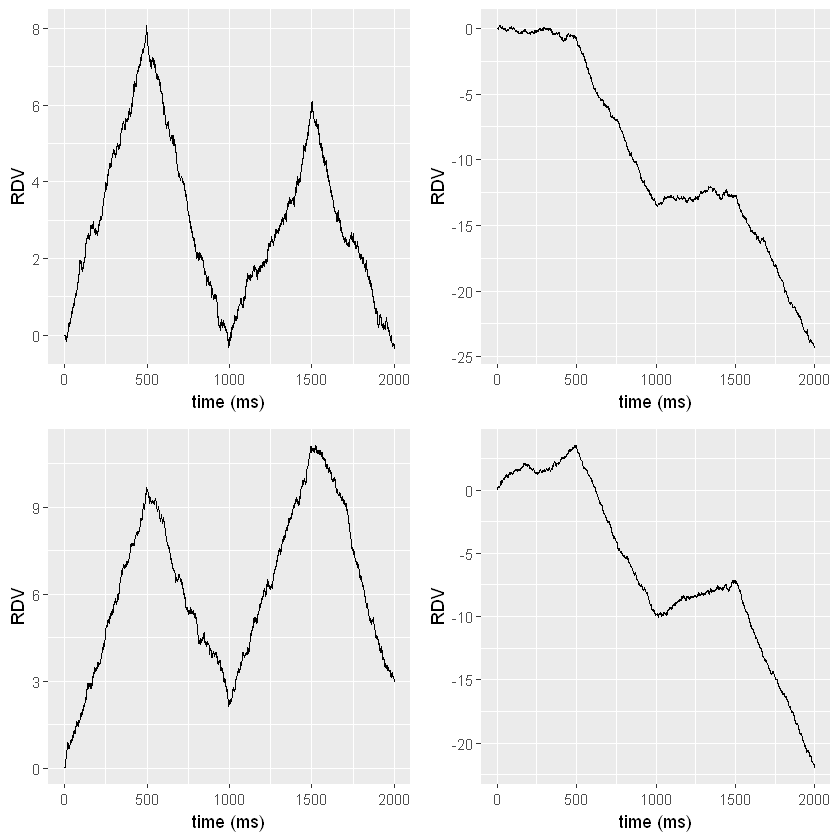

In [53]:
# plot single runs of ddm simulations on different plots, varying the parameters rL, rR and th

library(ggplot2)

p1 <- qplot(x=1:2000, y=ddmsimulation(7,7,0.005,0.6,0.05), geom="path", xlab="time (ms)", ylab="RDV")
p2 <- qplot(x=1:2000, y=ddmsimulation(5,8,0.005,0.6,0.05), geom="path", xlab="time (ms)", ylab="RDV")
p3 <- qplot(x=1:2000, y=ddmsimulation(7,7,0.005,0.5,0.05), geom="path", xlab="time (ms)", ylab="RDV")
p4 <- qplot(x=1:2000, y=ddmsimulation(5,8,0.005,0.5,0.05), geom="path", xlab="time (ms)", ylab="RDV")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)


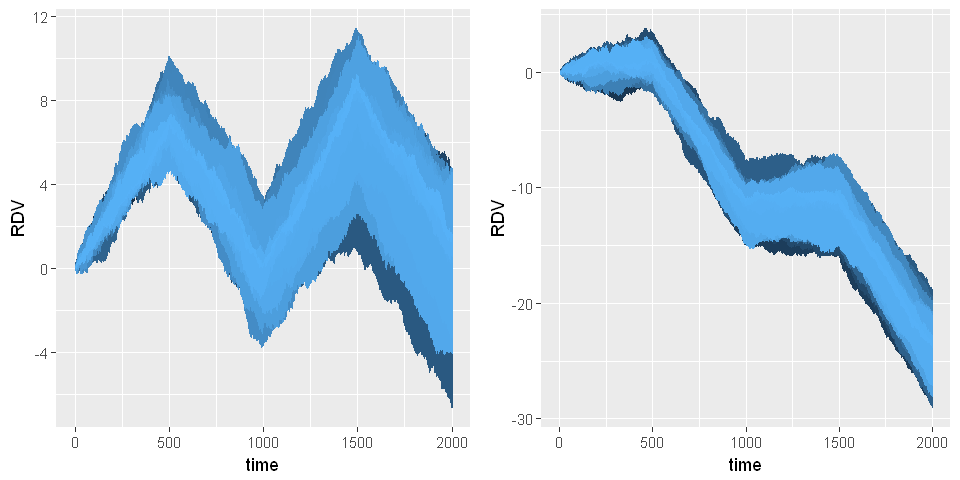

In [129]:
# monte carlo simulations: create many rounds of ddm model runs, tie them to a data frame and plot in same plots

# here with equal option values rR=7 and rL=7
mcdf1 <- data.frame(time=1:2000, RDV=ddmsimulation(7,7,0.005,0.6,0.05), mcrun=rep(1,2000))
for (i in 2:100) {
    mcdf1 <- rbind(mcdf1, data.frame(time=1:2000, RDV=ddmsimulation(7,7,0.005,0.6,0.05), mcrun=rep(i,2000)))
    }

# here with different option values rR=8 and rL=5
mcdf2 <- data.frame(time=1:2000, RDV=ddmsimulation(5,8,0.005,0.6,0.05), mcrun=rep(1,2000))
for (i in 2:100) {
    mcdf2 <- rbind(mcdf2, data.frame(time=1:2000, RDV=ddmsimulation(5,8,0.005,0.6,0.05), mcrun=rep(i,2000)))
    }

library(ggplot2)
options(repr.plot.width=8, repr.plot.height=4)

p1 <- ggplot(mcdf1, aes(x=time, y=RDV, col=mcrun)) + geom_line() + theme(legend.position = "none")
p2 <- ggplot(mcdf2, aes(x=time, y=RDV, col=mcrun)) + geom_line() + theme(legend.position = "none")

library(gridExtra)
grid.arrange(p1, p2, nrow = 1)